# Markov Decision Processes & Reinforcement Learning

## Part1 - Value Iteration and Policy Iteration

In [179]:
import mdptoolbox as mdp
import mdptoolbox.example as mdpex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import networkx as nx

In [199]:
mdp.mdp.MDP??

### Fire Management

In [11]:
prob = np.zeros((2,5,5)); prob

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

In [15]:
prob[0] = [[.3, .7,0,0,0],
           [.3, 0,.7,0,0],
           [.3, 0,0,.7,0],
           [.3, 0,0,0,.7],
           [.3, 0,0,0,.7] ]
prob[1] = [[1., 0,0,0,0],
           [1., 0,0,0,0],
           [1., 0,0,0,0],
           [1., 0,0,0,0],
           [1., 0,0,0,0] ]
prob

array([[[0.3, 0.7, 0. , 0. , 0. ],
        [0.3, 0. , 0.7, 0. , 0. ],
        [0.3, 0. , 0. , 0.7, 0. ],
        [0.3, 0. , 0. , 0. , 0.7],
        [0.3, 0. , 0. , 0. , 0.7]],

       [[1. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. ]]])

In [16]:
rewards  = np.zeros((5,2))
rewards[0] = [0.,0.]
rewards[1] = [0.,1.]
rewards[2] = [0.,1.]
rewards[3] = [0.,1.]
rewards[4] = [.3,2.]
rewards

array([[0. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.3, 2. ]])

In [92]:
# Value Iteration
vi = mdp.mdp.ValueIteration(prob, rewards,0.9)
vi.run()
viPol = vi.policy
viVals = vi.V
viT = vi.time
viN = vi.iter
print("Value Iteration :\n----------------\n Policy ==>",viPol,"\n Expected Values ==>",
      viVals, "\n Time ==>",viT,"\n Iterations ==>", viN)

Value Iteration :
----------------
 Policy ==> (0, 1, 1, 0, 1) 
 Expected Values ==> (3.1021779262212235, 3.7152970594035533, 3.7152970594035533, 3.732177926221223, 4.715297059403554) 
 Time ==> 0.0009927749633789062 
 Iterations ==> 16


In [98]:
vp=[];vv=[];vt=[];vn=[];
for g in range(1,10,1):
    g1 = g/10
    print(g1)
    vi = mdp.mdp.ValueIteration(prob, rewards,g1)
    vi.run()
    vp.append(vi.policy)
    vv.append(vi.V)
    vt.append(vi.time)
    vn.append(vi.iter)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [128]:
gv = [g/10 for g in range(1,10,1)]
vp

[(0, 1, 1, 1, 1),
 (0, 1, 1, 1, 1),
 (0, 1, 1, 1, 1),
 (0, 1, 1, 1, 1),
 (0, 1, 1, 1, 1),
 (0, 1, 1, 1, 1),
 (0, 1, 1, 1, 1),
 (0, 1, 1, 1, 1),
 (0, 1, 1, 0, 1)]

Text(0, 0.5, 'Expected Values')

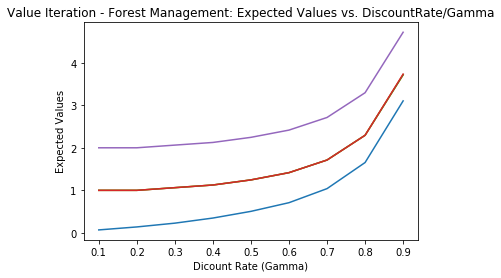

In [152]:
plt.plot(gv, vv)
plt.title("Value Iteration - Forest Management: Expected Values vs. DiscountRate/Gamma")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Expected Values")

Text(0, 0.5, 'Time (Seconds)')

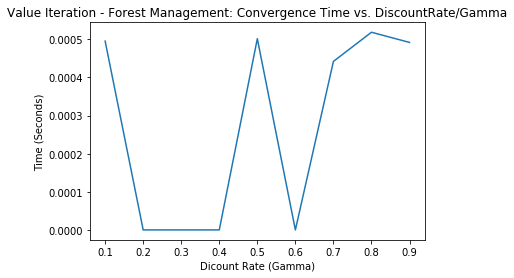

In [153]:
plt.plot(gv, vt)
plt.title("Value Iteration - Forest Management: Convergence Time vs. DiscountRate/Gamma")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Time (Seconds)")

Text(0, 0.5, 'Number of Iterations to Convergence')

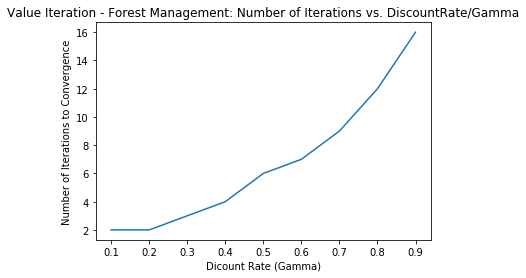

In [154]:
plt.plot(gv, vn)
plt.title("Value Iteration - Forest Management: Number of Iterations vs. DiscountRate/Gamma")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Number of Iterations to Convergence")

In [59]:
# Policy Iteration
pi = mdp.mdp.PolicyIteration(prob, rewards,0.9)
pi.run()
piPol = pi.policy
piVals = pi.V
piT = pi.time
piN = pi.iter
print("Policy Iteration :\n----------------\n Policy ==>",piPol,"\n Expected Values ==>",
      piVals, "\n Time ==>",piT, "\n Iterations ==>",piN)

Policy Iteration :
----------------
 Policy ==> (0, 1, 1, 0, 1) 
 Expected Values ==> (3.8650306748466257, 4.478527607361963, 4.478527607361963, 4.4950306748466256, 5.478527607361963) 
 Time ==> 0.0009882450103759766 
 Iterations ==> 2


In [104]:
pp=[];pv=[];pt=[];pn=[];
for g in range(1,10,1):
    g1 = g/10
    print(g1)
    pi = mdp.mdp.PolicyIteration(prob, rewards,g1)
    pi.run()
    pp.append(pi.policy)
    pv.append(pi.V)
    pt.append(pi.time)
    pn.append(pi.iter)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [129]:
gv = [g/10 for g in range(1,10,1)]
pp

[(0, 1, 1, 1, 1),
 (0, 1, 1, 1, 1),
 (0, 1, 1, 1, 1),
 (0, 1, 1, 1, 1),
 (0, 1, 1, 1, 1),
 (0, 1, 1, 1, 1),
 (0, 1, 1, 1, 1),
 (0, 1, 1, 1, 1),
 (0, 1, 1, 0, 1)]

Text(0, 0.5, 'Expected Values')

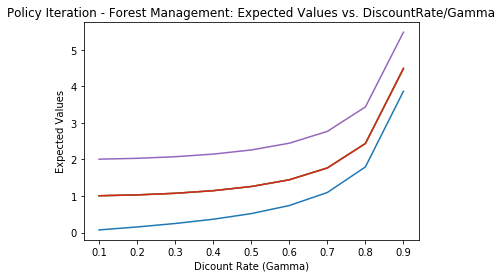

In [155]:
plt.plot(gv, pv)
plt.title("Policy Iteration - Forest Management: Expected Values vs. DiscountRate/Gamma")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Expected Values")

Text(0, 0.5, 'Time (Seconds)')

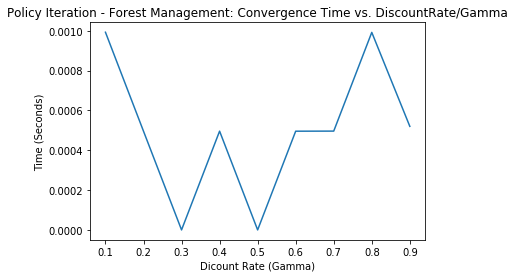

In [156]:
plt.plot(gv, pt)
plt.title("Policy Iteration - Forest Management: Convergence Time vs. DiscountRate/Gamma")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Time (Seconds)")

Text(0, 0.5, 'Number of Iterations to Convergence')

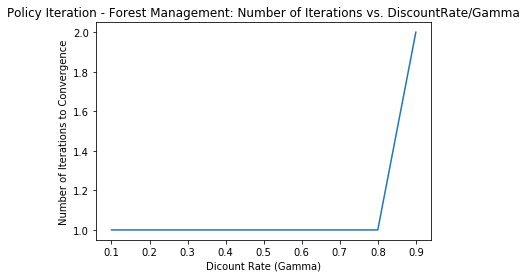

In [158]:
plt.plot(gv, pn)
plt.title("Policy Iteration - Forest Management: Number of Iterations vs. DiscountRate/Gamma")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Number of Iterations to Convergence")

In [46]:
# Q-Learning
ql = mdp.mdp.QLearning(prob, rewards,0.9)
ql.run()
qlPol = ql.policy
qlVals = ql.V
qlT = ql.time
print("Q-Learning :\n Policy ==>",qlPol,"\n Expected Values ==>", qlVals, "\n Time ==>",qlT)

Q-Learning :
 Policy ==> (0, 1, 1, 0, 1) 
 Expected Values ==> (3.7939347833893446, 4.4081639325215525, 4.047130584894242, 1.5369712765270271, 3.3870295626667644) 
 Time ==> 0.2866992950439453


In [212]:
qp=[];qv=[];qt=[];qn=[];
for g in range(1,10,1):
    g1 = g/10
    print(g1)
    ql = mdp.mdp.QLearning(prob, rewards,g1, n_iter=500000)
    ql.run()
    qp.append(ql.policy)
    qv.append(ql.V)
    qt.append(ql.time)
    #qn.append(ql.iter)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [213]:
gv = [g/10 for g in range(1,10,1)]
pd.DataFrame(qp)

,0,1,2,3,4
0,0,1,1,1,1
1,0,1,1,1,1
2,0,1,1,1,1
3,0,1,1,0,1
4,0,1,1,0,1
5,0,1,1,0,1
6,0,1,1,1,1
7,0,1,1,1,1
8,0,1,1,1,0


Text(0, 0.5, 'Expected Values')

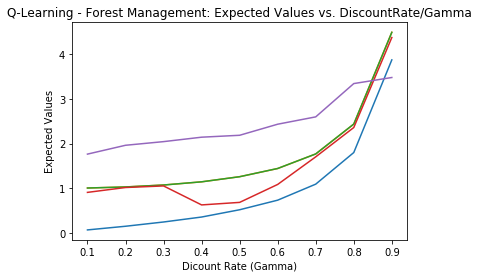

In [214]:
plt.plot(gv, qv)
plt.title("Q-Learning - Forest Management: Expected Values vs. DiscountRate/Gamma")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Expected Values")

Text(0, 0.5, 'Time (Seconds)')

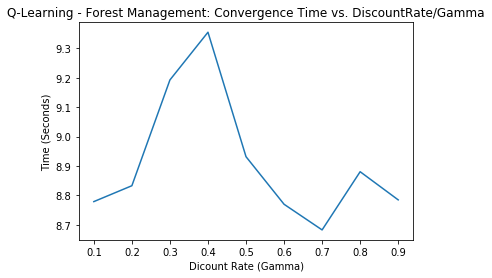

In [215]:
plt.plot(gv, qt)
plt.title("Q-Learning - Forest Management: Convergence Time vs. DiscountRate/Gamma")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Time (Seconds)")

In [216]:
### Overall Comparison on Time, Iterations and Expected Values

Text(0, 0.5, 'Number of Iterations to Convergence')

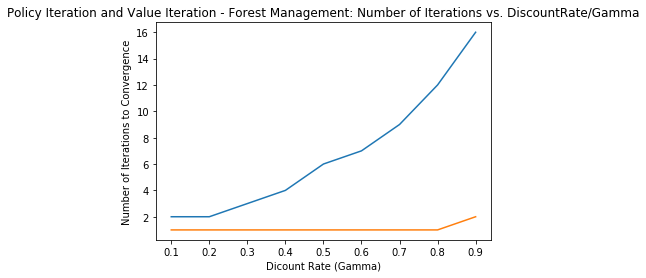

In [217]:
plt.plot(gv, vn)
plt.plot(gv, pn)
plt.title("Policy Iteration and Value Iteration - Forest Management: Number of Iterations vs. DiscountRate/Gamma")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Number of Iterations to Convergence")

Text(0, 0.5, 'Time (Seconds)')

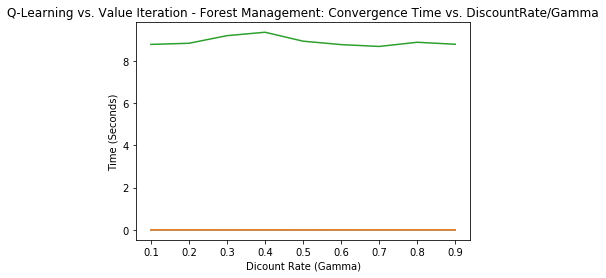

In [218]:
plt.plot(gv, vt)
plt.plot(gv, pt)
plt.plot(gv, qt)
plt.title("Q-Learning vs. Value Iteration - Forest Management: Convergence Time vs. DiscountRate/Gamma")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Time (Seconds)")

Text(0, 0.5, 'Time (Seconds)')

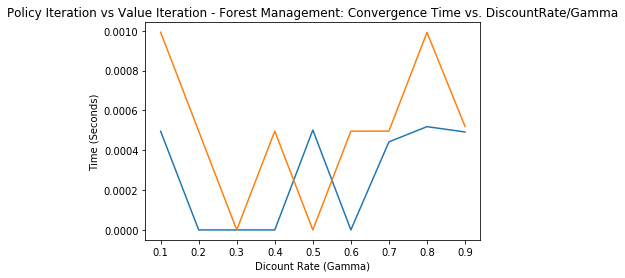

In [219]:
plt.plot(gv, vt)
plt.plot(gv, pt)
#plt.plot(gv, qt)
plt.title("Policy Iteration vs Value Iteration - Forest Management: Convergence Time vs. DiscountRate/Gamma")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Time (Seconds)")